<a href="https://colab.research.google.com/github/ricardoruedas/ML/blob/main/%5B07%5D%20-%20ML%20en%20la%20Empresa/MLOps_50k_annotated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪📦 MLOps — Cuaderno Anotado

Este cuaderno ha sido **anotado**: se añadieron **cabeceras por bloques** y **comentarios** sin modificar la lógica del código.

## Índice rápido
- Instalación / Carga de datos
- EDA y limpieza
- Partición Train/Test
- Preprocesado (ColumnTransformer)
- Modelado (Baseline y Gradient Boosting)
- Evaluación (metrics y ROC)
- Guardado de artefactos
- API con FastAPI
- Exposición con Cloudflare Tunnel
- Cliente: pruebas `/predict` y CSV por lotes
- Monitorización básica y deriva


# 🎯 Caso Práctico: Industrializar un modelo


---

## 📋 Información del Módulo

**Asignatura:** Data Analytics: Data Science, Machine Learning e Inteligencia Artificial  
**Máster:** FP en Business Analytics e Inteligencia Artificial  
**Profesores:** Álvaro López Barberá
**Ejemplo Práctico:**  ML en la empresa

---

## 🎓 Objetivo

Desarrollar un modelo de ML e industrializarlo


## 1) Datos


In [ ]:
#La tarea de predicción consiste en determinar si los ingresos de una persona superan los 50 000 dólares al año.
#https://archive.ics.uci.edu/dataset/2/adult

#Descargar el archivo de Google Drive, ya que esta adaptado a formato excel .csv
#https://drive.google.com/file/d/1XnNeKe_AKvcKlLg_Piq6c4N_h-gFbMg9/view?usp=sharing

---

## 📦 PASO 1: Subir el archivo .CSV


## 2) Carga de datos en Colab (subida de archivos locales)
- Abre un selector de archivos para subir CSV/artefactos desde tu ordenador.
- Usa `pd.read_csv(...)` para leer en memoria.


In [1]:
# 1) Subir el CSV local (abre un selector de archivos)
from google.colab import files
import io, pandas as pd

uploaded = files.upload("adult_raw.csv")  # selecciona tu archivo, p.ej. adult_raw.csv
fname = next(iter(uploaded))  # toma el nombre del primer archivo subido

# 2) Leer con pandas
#    - cambia 'sep' si tu CSV usa ; en vez de ,
#    - añade encoding='latin-1' si te da error de codificación
df = pd.read_csv(io.BytesIO(uploaded[fname]), sep=",", low_memory=False)

# 3) Verificar carga
print("Archivo cargado:", fname)
print("Forma:", df.shape)
display(df.head(10))

#fnlwgt en el dataset Adult significa “final weight” (peso muestral final) del CPS (Current Population Survey): “cuántas personas de la población representa ese registro”

Saving adult_raw.csv to adult_raw.csv/adult_raw.csv
Archivo cargado: adult_raw.csv/adult_raw.csv
Forma: (48842, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [2]:
#Importaciones y carga desde archivo ya subido (o vuelve a subir)
import pandas as pd
import numpy as np

# Si ya tienes df en memoria, solo mostramos las primeras filas:
display(df.head(5))
print(df.shape)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


(48842, 15)


## 4) EDA básico: estructura, estadísticas y distribuciones
- Explora tipos de datos y valores faltantes.
- Revisa estadísticas descriptivas y la distribución de la variable objetivo.


In [3]:
#Inspección rápida (tipos, nulos, valores únicos de la etiqueta)
# Vista general del dataset
df.info()

# Estadísticos básicos numéricos
display(df.describe())

# Comprobamos valores nulos y conteo por columna
display(df.isna().sum())

# Comprobamos distribución del target (income)
print(df['income'].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  float64
 5   marital_status  48842 non-null  object 
 6   occupation      46033 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  47985 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


,0
age,0
workclass,2799
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,2809
relationship,0
race,0
sex,0


income
<=50K    37155
>50K     11687
Name: count, dtype: int64


## 5) Limpieza ligera y normalización de valores
- Convierte marcadores de faltantes (`?`) a `NaN`.
- Elimina espacios en blanco y normaliza etiquetas/cadenas.


In [4]:
# 1) Eliminamos espacios alrededor de strings por si vienen en crudo
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].astype(str).str.strip()

# 2) Normalizamos valores de la etiqueta (por si vinieran con puntos)
df['income'] = df['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})

# 3) Convertimos la etiqueta a binaria: 1 si >50K, 0 si <=50K
df['income_binary'] = (df['income'] == '>50K').astype(int)

# 4) Identificamos columnas numéricas y categóricas (según Adult UCI)
num_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
cat_cols = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

# 5) Reemplazamos los '?' por NaN para poder imputar después
df.replace('?', np.nan, inplace=True)

# 6) Echamos un vistazo de nuevo a los nulos
display(df[ num_cols + cat_cols + ['income','income_binary'] ].isna().sum())
display(df.head(3))


,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0
workclass,0
education,0
marital_status,0
occupation,0


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_binary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0


EDA básico


## 6) EDA básico: estructura, estadísticas y distribuciones
- Explora tipos de datos y valores faltantes.
- Revisa estadísticas descriptivas y la distribución de la variable objetivo.


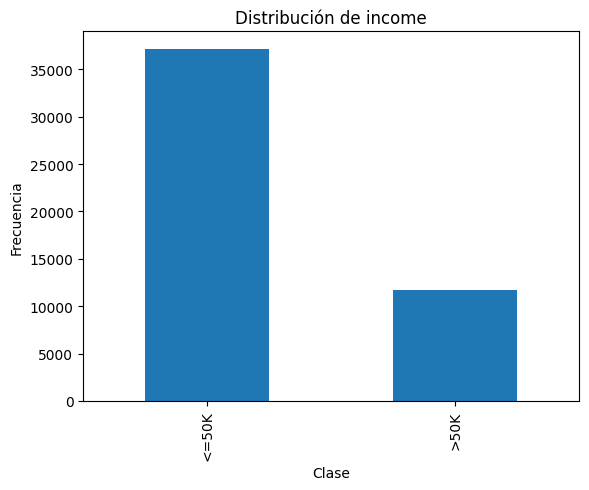

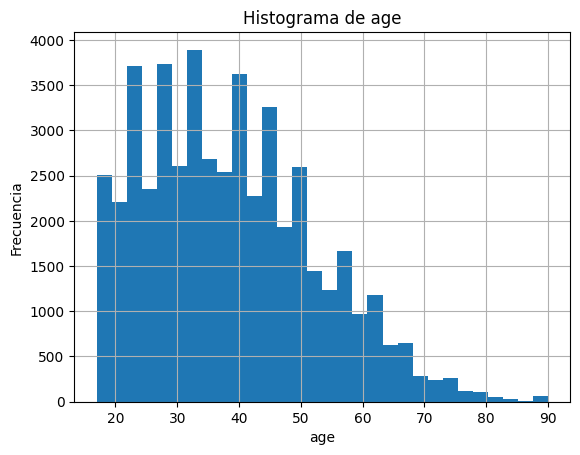

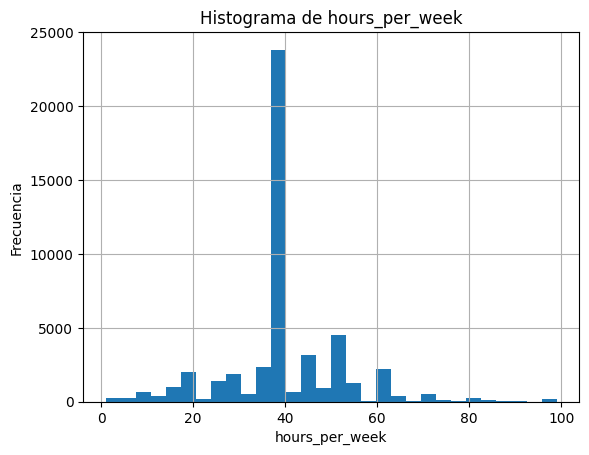

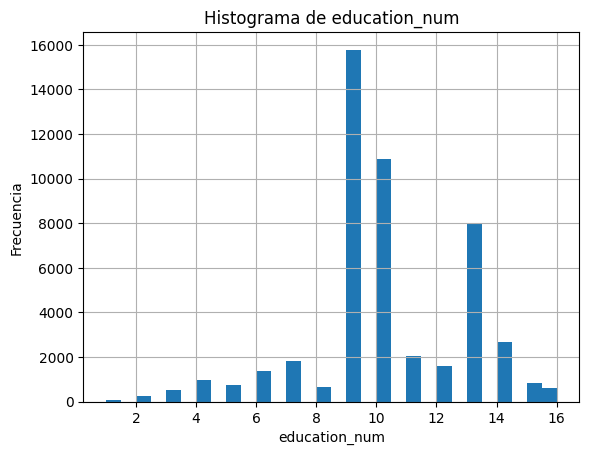

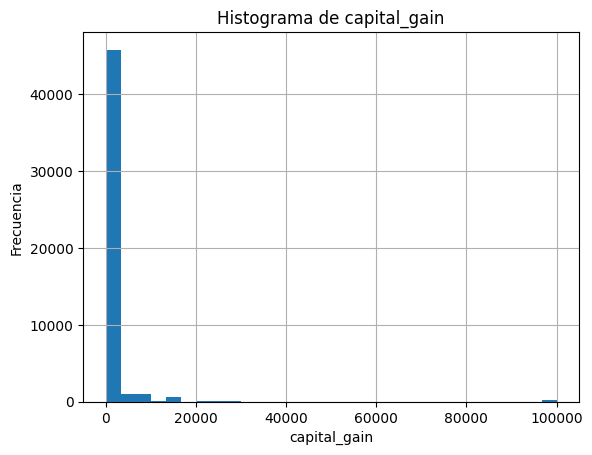

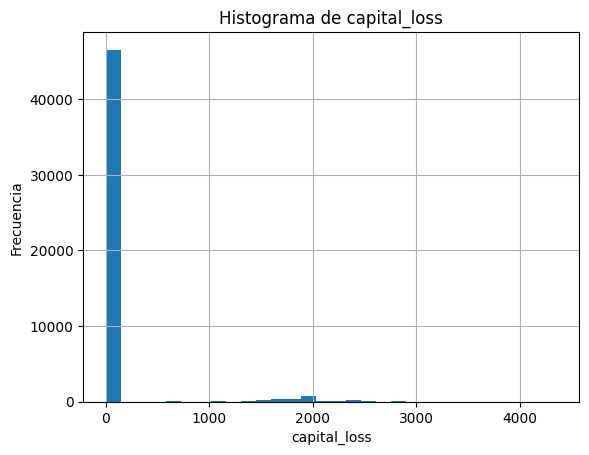

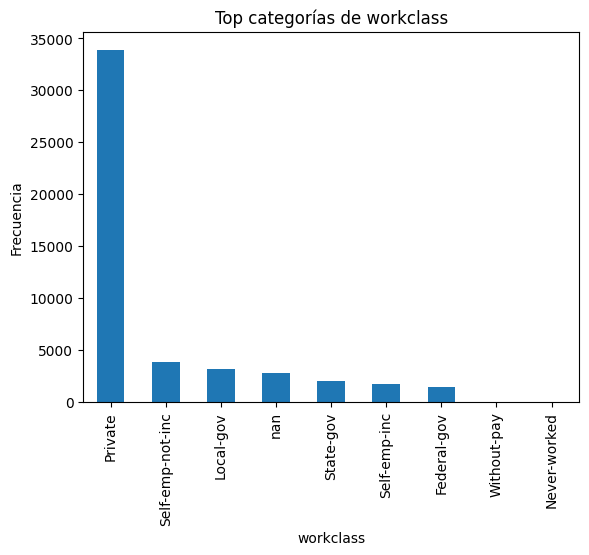

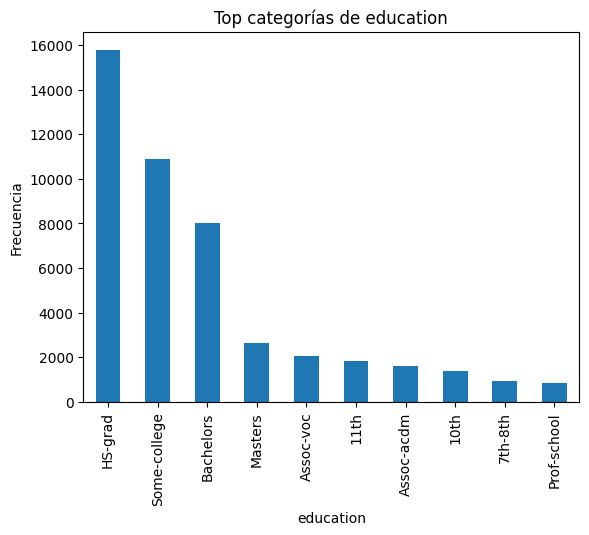

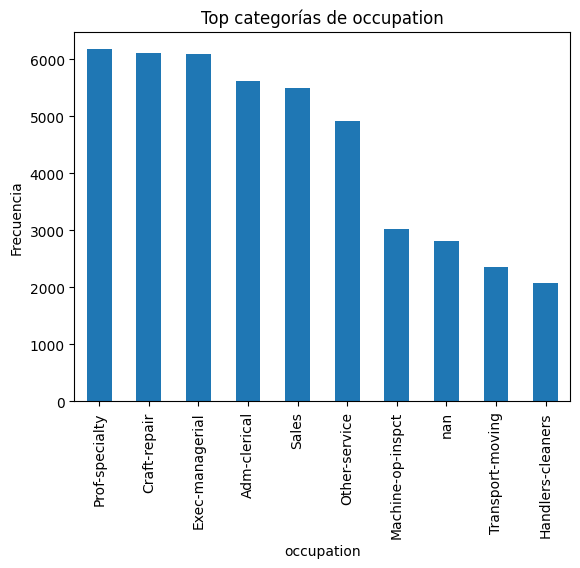

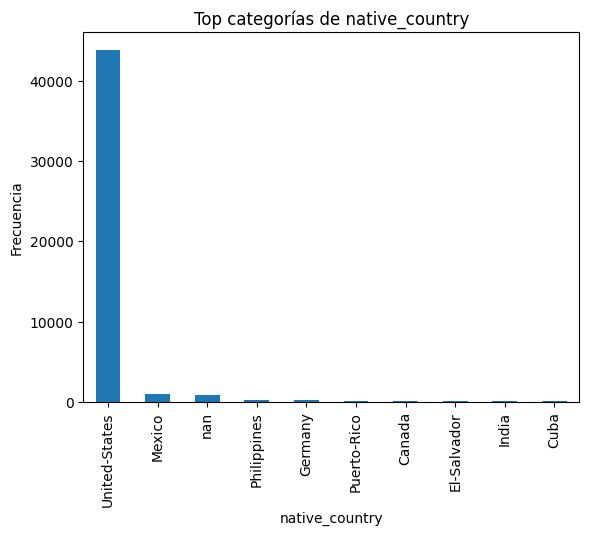

In [5]:
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
df['income'].value_counts().plot(kind='bar', title='Distribución de income')
plt.xlabel('Clase'); plt.ylabel('Frecuencia'); plt.show()

# Histograma rápido de algunas numéricas
for col in ['age', 'hours_per_week', 'education_num', 'capital_gain', 'capital_loss']:
    df[col].hist(bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col); plt.ylabel('Frecuencia'); plt.show()

# Top categorías en algunas variables categóricas
for col in ['workclass','education','occupation','native_country']:
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top categorías de {col}')
    plt.xlabel(col); plt.ylabel('Frecuencia'); plt.show()

# Adult tiene clase algo desbalanceada (más <=50K que >50K). Lo tendremos en cuenta con métricas (precision/recall) además del accuracy.

## 7) Partición de datos: Train/Test estratificado
- Separa en entrenamiento y prueba manteniendo la proporción de clases.
- Fija `random_state` para reproducibilidad.


In [6]:
# Separar X/y y train/test
from sklearn.model_selection import train_test_split

# Seleccionamos X e y (usaremos income_binary como objetivo)
X = df[num_cols + cat_cols].copy()
y = df['income_binary'].copy()

# Split estratificado para respetar proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()  # quick check

((39073, 14),
 (9769, 14),
 np.float64(0.23927008420136667),
 np.float64(0.23932848807452145))

## 8) Preprocesado de variables (numéricas y categóricas)
- Imputación de nulos en numéricas (mediana) y categóricas (moda).
- Escalado estándar para numéricas y One-Hot Encoding para categóricas.


In [7]:
#Preprocesado (imputación + escalado en numéricas, one-hot en categóricas)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Transformaciones por tipo de variable
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # SimpleImputer: Rellena valores faltantes (NaN) con la mediana de cada columna
    ('scaler', StandardScaler())                    # Estandariza los datos para que tengan media=0 y varianza=1
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),      # Transformador para variables categóricas, imputa con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))         # Convierte categorías en variables binarias (0/1)one-hot robusto
])

preprocess = ColumnTransformer(  #ColumnTransformer aplica transformaciones diferentes a columnas específicas:
    transformers=[
        ('num', numeric_transformer, num_cols),       #a las numericas
        ('cat', categorical_transformer, cat_cols)    #a las categoricas
    ]
)

# Probamos el transform para ver dimensiones resultantes, Aplicación del preprocesamiento
X_train_transformed = preprocess.fit_transform(X_train)
X_test_transformed = preprocess.transform(X_test)
X_train_transformed.shape, X_test_transformed.shape

((39073, 108), (9769, 108))

## 9) Modelo base: Regresión Logística
- Modelo lineal de referencia para comparar rendimiento.
- Útil como baseline rápido.


In [8]:
#Entrenar un modelo base (Regresión Logística) con pipeline completo
from sklearn.linear_model import LogisticRegression

# Creamos un pipeline con el preprocess y el modelo
model_lr = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenamos
model_lr.fit(X_train, y_train)

# Predicciones y métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (LR):", acc_lr)
print("\nClassification Report (LR):\n", classification_report(y_test, y_pred_lr, digits=3))
print("\nConfusion matrix (LR):\n", confusion_matrix(y_test, y_pred_lr))

Accuracy (LR): 0.8518783908281298

Classification Report (LR):
               precision    recall  f1-score   support

           0      0.881     0.931     0.905      7431
           1      0.732     0.601     0.660      2338

    accuracy                          0.852      9769
   macro avg      0.807     0.766     0.783      9769
weighted avg      0.845     0.852     0.847      9769


Confusion matrix (LR):
 [[6917  514]
 [ 933 1405]]


## 10) Modelo de Gradient Boosting + Pipeline completo


In [9]:
#Probar un modelo de árboles (Gradient Boosting) para comparar
from sklearn.ensemble import GradientBoostingClassifier

model_gb = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', GradientBoostingClassifier(random_state=42))
])

model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (GB):", acc_gb)
print("\nClassification Report (GB):\n", classification_report(y_test, y_pred_gb, digits=3))
print("\nConfusion matrix (GB):\n", confusion_matrix(y_test, y_pred_gb))


Accuracy (GB): 0.8716347630258983

Classification Report (GB):
               precision    recall  f1-score   support

           0      0.888     0.951     0.918      7431
           1      0.798     0.621     0.698      2338

    accuracy                          0.872      9769
   macro avg      0.843     0.786     0.808      9769
weighted avg      0.867     0.872     0.866      9769


Confusion matrix (GB):
 [[7064  367]
 [ 887 1451]]


## 11) Evaluación de modelo: accuracy, matriz de confusión y ROC-AUC
- Calcula métricas principales en el conjunto de prueba.
- Curva ROC para comparar modelos y escoger el mejor.


ROC-AUC LR: 0.906 | ROC-AUC GB: 0.925


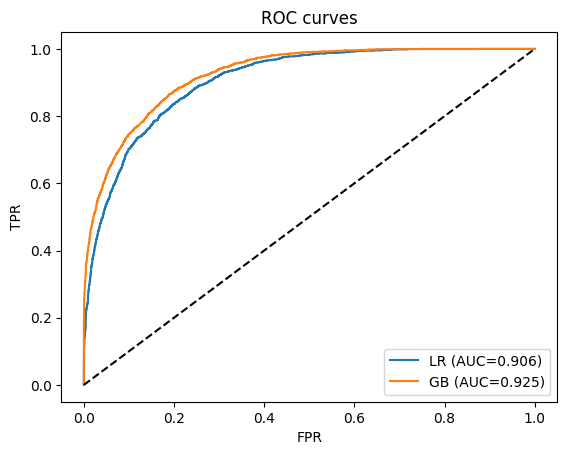

Modelo elegido: GradientBoostingClassifier


In [10]:
#Elegir el mejor (rápido) y evaluar con ROC-AUC (probabilidades)
from sklearn.metrics import roc_auc_score, roc_curve

# Obtenemos probabilidades para ROC-AUC (clase positiva = 1)
y_proba_lr = model_lr.predict_proba(X_test)[:,1]
y_proba_gb = model_gb.predict_proba(X_test)[:,1]

auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_gb = roc_auc_score(y_test, y_proba_gb)

print(f"ROC-AUC LR: {auc_lr:.3f} | ROC-AUC GB: {auc_gb:.3f}")

# Curvas ROC (opcional visual)
import matplotlib.pyplot as plt
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={auc_lr:.3f})")
plt.plot(fpr_gb, tpr_gb, label=f"GB (AUC={auc_gb:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC curves')
plt.legend(); plt.show()

# Seleccionamos el mejor por AUC (o por la métrica que prefieras)
mejor_modelo = model_gb if auc_gb >= auc_lr else model_lr
print("Modelo elegido:", type(mejor_modelo.named_steps['clf']).__name__)


## 12) Guardado de artefactos (archivos minimos): modelo y metadatos
- Serializa el Pipeline entrenado en disco.
- Guarda un metadata.json con versión, features y métricas.


In [11]:
#Guardar el modelo y metadatos (para servir o reusar)
import joblib, json
from pathlib import Path
from datetime import datetime

MODEL_DIR = Path("model"); MODEL_DIR.mkdir(exist_ok=True)
MODEL_PATH = MODEL_DIR / "adult_best_model.joblib"
META_PATH = MODEL_DIR / "metadata.json"

joblib.dump(mejor_modelo, MODEL_PATH)

metadata = {
    "dataset": "adult_raw.csv",
    "target": "income_binary",
    "numeric_features": num_cols,
    "categorical_features": cat_cols,
    "chosen_model": type(mejor_modelo.named_steps['clf']).__name__,
    "metrics": {
        "accuracy_test_lr": float(acc_lr),
        "accuracy_test_gb": float(acc_gb),
        "roc_auc_lr": float(auc_lr),
        "roc_auc_gb": float(auc_gb)
    },
    "saved_at": datetime.now().isoformat(timespec='seconds')
}

with open(META_PATH, "w", encoding="utf-8") as f:
    json.dump(metadata, f, indent=2)

print("Guardados:")
print(" -", MODEL_PATH)
print(" -", META_PATH)


Guardados:
 - model/adult_best_model.joblib
 - model/metadata.json


## 13) Prueba de modelo manual


In [21]:
# probamos el modelo con una fila simulada metida a mano
# Construimos un ejemplo "tipo" (puedes ajustar valores a mano)
ejemplo = pd.DataFrame([{
    "age": 39,
    "fnlwgt": 50000,
    "education_num": 13,
    "capital_gain": 60000,
    "capital_loss": 0,
    "hours_per_week": 40,
    "workclass": "State-gov",
    "education": "Bachelors",
    "marital_status": "Never-married",
    "occupation": "Adm-clerical",
    "relationship": "Not-in-family",
    "race": "White",
    "sex": "Male",
    "native_country": "United-States"
}])

# Cargar el modelo guardado y predecir
loaded = joblib.load(MODEL_PATH)
pred = loaded.predict(ejemplo)[0]
proba = loaded.predict_proba(ejemplo)[0,1] #Devuelve probabilidades por clase [0, 1] = “primera fila, probabilidad de la clase 1”
print("Predicción (1=> >50K):", int(pred), "| Probabilidad clase positiva:", round(float(proba), 3))
print("Recordamos: 1 ⇒ gana > 50K, 0 ⇒ gana ≤ 50K.")
print("Sale 0, el modelo está diciendo “no supera los 50k (USD)”")


Predicción (1=> >50K): 1 | Probabilidad clase positiva: 0.963
Recordamos: 1 ⇒ gana > 50K, 0 ⇒ gana ≤ 50K.
Sale 0, el modelo está diciendo “no supera los 50k (USD)”


## Vamos con la parte de MLOps en colab ✈✈✈✈✈


## 14) Instalación de dependencias

In [22]:
# FastAPI para la API, Uvicorn como servidor ASGI, pyngrok para exponer URL pública.
# joblib/scikit-learn para cargar tu pipeline.
!pip install fastapi uvicorn pyngrok "pydantic>=2" joblib scikit-learn -q

## 15) Modelo de Gradient Boosting + Pipeline completo


In [23]:
#Cargar el modelo y definir las columnas esperadas
import os, joblib
import pandas as pd

# Ruta donde guardaste el mejor modelo (pipeline con preprocess + GradientBoosting)
MODEL_PATH = "/content/model/adult_best_model.joblib"  # cámbialo si lo guardaste en otra ruta

assert os.path.exists(MODEL_PATH), f"No encuentro el modelo en {MODEL_PATH}. Entrena y guarda antes."

# Cargamos el pipeline: preprocess + clf (GradientBoostingClassifier)
pipeline = joblib.load(MODEL_PATH)

# Columnas usadas en tu entrenamiento (ajústalas si cambiaste algo en el EDA)
num_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
cat_cols = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

# Para recordar: la etiqueta binaria que usaste
target_col = "income_binary"

# Chequeo rápido: el pipeline debería tener .predict y .predict_proba
print("OK, modelo cargado. Ejemplo de predict_proba disponible:", hasattr(pipeline, "predict_proba"))

OK, modelo cargado. Ejemplo de predict_proba disponible: True


## 16) Definir la API (FastAPI) con esquemas (Pydantic) y endpoints


In [24]:
#GET / → healthcheck
#GET /model_info → información básica del modelo y columnas esperadas
#POST /predict → predicciones por lote (lista de registros), devuelve predicción binaria y probabilidad de clase 1 (>50K)


from fastapi import FastAPI
from pydantic import BaseModel, Field
from typing import List, Optional

# 1) Esquema de entrada: definimos un item con todas las features necesarias
class AdultItem(BaseModel):
    # Numéricas
    age: float = Field(..., ge=0)
    fnlwgt: float = Field(..., ge=0)
    education_num: float = Field(..., ge=0)
    capital_gain: float = Field(..., ge=0)
    capital_loss: float = Field(..., ge=0)
    hours_per_week: float = Field(..., ge=0)
    # Categóricas (como strings)
    workclass: str
    education: str
    marital_status: str
    occupation: str
    relationship: str
    race: str
    sex: str
    native_country: str

class AdultBatch(BaseModel):
    items: List[AdultItem]

# 2) Crear la app FastAPI
app = FastAPI(title="Adult Income API (Colab)", version="1.0")

# 3) Endpoints
@app.get("/")
def health():
    return {"status": "ok"}

@app.get("/model_info")
def model_info():
    return {
        "model_type": type(pipeline.named_steps['clf']).__name__ if 'clf' in pipeline.named_steps else str(type(pipeline)),
        "target": target_col,
        "numeric_features": num_cols,
        "categorical_features": cat_cols
    }

@app.post("/predict")
def predict(batch: AdultBatch):
    # Convertimos la lista de AdultItem en un DataFrame con el orden correcto de columnas
    rows = []
    for x in batch.items:
        rows.append({
            # Numéricas
            "age": x.age,
            "fnlwgt": x.fnlwgt,
            "education_num": x.education_num,
            "capital_gain": x.capital_gain,
            "capital_loss": x.capital_loss,
            "hours_per_week": x.hours_per_week,
            # Categóricas
            "workclass": x.workclass.strip(),
            "education": x.education.strip(),
            "marital_status": x.marital_status.strip(),
            "occupation": x.occupation.strip(),
            "relationship": x.relationship.strip(),
            "race": x.race.strip(),
            "sex": x.sex.strip(),
            "native_country": x.native_country.strip()
        })
    X = pd.DataFrame(rows, columns=num_cols + cat_cols)

    # Predicciones
    preds = pipeline.predict(X)  # 0 = <=50K, 1 = >50K
    if hasattr(pipeline, "predict_proba"):
        probas = pipeline.predict_proba(X)[:, 1].tolist()
    else:
        probas = [None] * len(preds)

    # Preparar salida legible
    out = []
    for i, p in enumerate(preds):
        out.append({
            "prediction_binary": int(p),
            "prediction_label": ">50K (USD)" if int(p) == 1 else "<=50K (USD)",
            "proba_gt_50k": None if probas[i] is None else float(probas[i])
        })
    return {"items": out}


## 17) Crear la API públicamente con Cloudflare Tunnel
- Imprime una URL pública para pruebas sin consola.


In [25]:
# ✅ Cloudflare Tunnel en Colab (sin cuenta), se podria usar ngrok pero necesitas cuenta y el token que te da
# - Arranca Uvicorn si no está corriendo
# - Descarga el binario oficial de cloudflared
# - Abre túnel a http://localhost:8000 y captura la URL pública

import threading, uvicorn, subprocess, re, time, os, sys
from pathlib import Path

# 1) Arrancar Uvicorn en segundo plano solo si no está ya
def run_uvicorn():
    uvicorn.run(app, host="0.0.0.0", port=8000, log_level="info")

try:
    thread.is_alive()
except NameError:
    thread = None

if not thread or not thread.is_alive():
    thread = threading.Thread(target=run_uvicorn, daemon=True)
    thread.start()
    time.sleep(2)  # pequeña pausa para que arranque el servidor

# 2) Descargar el binario cloudflared (Linux AMD64) y dar permisos
#    Si ya existe, no lo descargamos de nuevo.
bin_path = Path("/content/cloudflared")
if not bin_path.exists():
    # Descarga del último release estable
    !curl -L https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -o /content/cloudflared -#
    !chmod +x /content/cloudflared

# 3) Abrir el túnel a localhost:8000
#    NOTA: usamos "./cloudflared" (ruta absoluta) porque no está en el PATH
proc = subprocess.Popen(
    [str(bin_path), "tunnel", "--url", "http://localhost:8000", "--no-autoupdate"],
    stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
)

public_url = None
start_time = time.time()
timeout_sec = 60  # tiempo máximo para encontrar la URL

while True:
    line = proc.stdout.readline()
    if not line:
        if time.time() - start_time > timeout_sec:
            break
        time.sleep(0.1)
        continue
    # Busca la URL https://xxxxx.trycloudflare.com en la salida
    m = re.search(r"https://[a-zA-Z0-9-]+\.trycloudflare\.com", line)
    if m:
        public_url = m.group(0)
        break

if public_url:
    print("URL pública:", public_url)
    print("Docs (Swagger):", public_url + "/docs")
else:
    print("No pude capturar la URL pública. Revisa el log de arriba.")


URL pública: https://compaq-saver-garcia-humor.trycloudflare.com
Docs (Swagger): https://compaq-saver-garcia-humor.trycloudflare.com/docs


## 18) Probar la API públicamente con Cloudflare Tunnel
- Testear si funciona la URL pública.


In [26]:
# === Exponer la API públicamente con Cloudflare Tunnel ===
# Nota: Comentarios añadidos para claridad; el código mantiene su comportamiento original.
# Helper: configurar la URL pública
# Pega aquí la URL pública que imprimió el bloque de Cloudflare.
public_url = "https://compaq-saver-garcia-humor.trycloudflare.com"  # <-- CAMBIA ESTO

import requests, time, json
import pandas as pd
import numpy as np
from pathlib import Path

# Comprobación rápida
r = requests.get(f"{public_url}/")
print("Health:", r.status_code, r.json())

info = requests.get(f"{public_url}/model_info").json()
info


INFO:     34.56.134.198:0 - "GET / HTTP/1.1" 200 OK
Health: 200 {'status': 'ok'}
INFO:     34.56.134.198:0 - "GET /model_info HTTP/1.1" 200 OK


{'model_type': 'GradientBoostingClassifier',
 'target': 'income_binary',
 'numeric_features': ['age',
  'fnlwgt',
  'education_num',
  'capital_gain',
  'capital_loss',
  'hours_per_week'],
 'categorical_features': ['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native_country']}

In [27]:
#Ejemplo de nuevo inputs
# https://drive.google.com/file/d/1GyvKiza4ffqQS7HkxNzdzmA1RwTY0Bfp/view?usp=sharing
# Sin el income, columna objetivo

Este CSV debe tener las mismas columnas de features que usamos al entrenar:

Numéricas: ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

Categóricas: ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']


## 20) Carga de datos en Colab (subida de archivos locales)
- Abre un selector de archivos para subir CSV/artefactos desde tu ordenador.
- Usa `pd.read_csv(...)` para leer en memoria.


In [28]:
# Subir un CSV con filas “nuevas” y normalizar columnas

# 1) Subir CSV local con nuevas filas para inferencia (SIN columna objetivo)
from google.colab import files
import io

uploaded = files.upload("adult_raw_new")  # selecciona tu CSV de entrada (ej. new_samples.csv)
fname = next(iter(uploaded))
new_df = pd.read_csv(io.BytesIO(uploaded[fname]))
print("Shape:", new_df.shape)
display(new_df.head(3))

# 2) Asegurar columnas en el orden y nombre esperado
num_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
cat_cols = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
expected_cols = num_cols + cat_cols

# Validación: faltantes/sobrantes
missing = [c for c in expected_cols if c not in new_df.columns]
extra   = [c for c in new_df.columns if c not in expected_cols]
print("Faltan:", missing)
print("Sobrantes:", extra)

# Normalización básica: trim de strings, coerción de numéricas
for c in cat_cols:
    if c in new_df.columns:
        new_df[c] = new_df[c].astype(str).str.strip()

for c in num_cols:
    if c in new_df.columns:
        new_df[c] = pd.to_numeric(new_df[c], errors='coerce')

# (Opcional) Si faltan columnas categóricas, puedes rellenar con 'Unknown'
for c in missing:
    if c in cat_cols:
        new_df[c] = "Unknown"
    elif c in num_cols:
        new_df[c] = np.nan  # deja NaN: el pipeline imputará si lo permite (en tu entrenamiento lo hace)

# Reordenar columnas
new_df = new_df[expected_cols]
display(new_df.head(3))


Saving adult_raw_new.csv to adult_raw_new.csv
Shape: (4, 14)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,45,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,21740.0,0.0,40.0,United-States
1,50,Private,286370.0,7th-8th,4.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,Mexico
2,42,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States


Faltan: []
Sobrantes: []


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,45,77516.0,13.0,21740.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,286370.0,4.0,0.0,0.0,40.0,Private,7th-8th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico
2,42,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States


## 21) Prueba cliente: petición HTTP a /predict
- Construye el JSON de entrada y envía una petición POST.
- Lee y valida la respuesta del servidor (predicción y probabilidad).


In [29]:
#Predicción por lotes contra /predict (con chunking + logs)
#Envía en bloques para no saturar el endpoint.
#Registra latencia y guarda logs y salida.

# Parámetros de lote
BATCH_SIZE = 256

# Directorios de salida
Path("logs").mkdir(exist_ok=True)
Path("predictions").mkdir(exist_ok=True)

all_results = []
latencies = []

def to_payload(df_chunk: pd.DataFrame):
    # Convierte un DataFrame (ordenado) en el JSON que espera la API
    items = []
    for _, row in df_chunk.iterrows():
        items.append({
            "age": float(row["age"]) if pd.notna(row["age"]) else 0.0,
            "fnlwgt": float(row["fnlwgt"]) if pd.notna(row["fnlwgt"]) else 0.0,
            "education_num": float(row["education_num"]) if pd.notna(row["education_num"]) else 0.0,
            "capital_gain": float(row["capital_gain"]) if pd.notna(row["capital_gain"]) else 0.0,
            "capital_loss": float(row["capital_loss"]) if pd.notna(row["capital_loss"]) else 0.0,
            "hours_per_week": float(row["hours_per_week"]) if pd.notna(row["hours_per_week"]) else 0.0,
            "workclass": str(row["workclass"]),
            "education": str(row["education"]),
            "marital_status": str(row["marital_status"]),
            "occupation": str(row["occupation"]),
            "relationship": str(row["relationship"]),
            "race": str(row["race"]),
            "sex": str(row["sex"]),
            "native_country": str(row["native_country"])
        })
    return {"items": items}

# Loop por lotes
for start in range(0, len(new_df), BATCH_SIZE):
    end = min(start + BATCH_SIZE, len(new_df))
    chunk = new_df.iloc[start:end].copy()

    payload = to_payload(chunk)

    t0 = time.time()
    resp = requests.post(f"{public_url}/predict", json=payload, timeout=60)
    dt = time.time() - t0
    latencies.append(dt)

    # Logging básico por bloque
    log_row = {
        "start": int(start),
        "end": int(end),
        "status_code": int(resp.status_code),
        "latency_sec": float(dt)
    }
    with open("logs/predict_calls.csv", "a", encoding="utf-8") as f:
        f.write(json.dumps(log_row) + "\n")

    resp.raise_for_status()
    preds = resp.json()["items"]
    all_results.extend(preds)

print(f"Chunks: {int(np.ceil(len(new_df)/BATCH_SIZE))} | Latencia media: {np.mean(latencies):.3f}s")
len(all_results)


INFO:     34.56.134.198:0 - "POST /predict HTTP/1.1" 200 OK
Chunks: 1 | Latencia media: 0.275s


4

## 22) Traemos datos de vuelta del modelo


In [30]:
#Construir el DataFrame de salida y guardarlo
# Añadimos predicción y probas al DF original
out_df = new_df.copy()
out_df["prediction_binary"] = [r["prediction_binary"] for r in all_results]
out_df["prediction_label"]  = [r["prediction_label"]  for r in all_results]
out_df["proba_gt_50k"]      = [r["proba_gt_50k"]      for r in all_results]

# Guardar a CSV
out_name = "predictions/predictions_adult_gradientboosting.csv"
out_df.to_csv(out_name, index=False)
print("Guardado:", out_name)

# Mostrar una muestra
display(out_df.head(10))

Guardado: predictions/predictions_adult_gradientboosting.csv


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,prediction_binary,prediction_label,proba_gt_50k
0,45,77516.0,13.0,21740.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,1,>50K (USD),0.966087
1,50,286370.0,4.0,0.0,0.0,40.0,Private,7th-8th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico,0,<=50K (USD),0.096582
2,42,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0,<=50K (USD),0.044126
3,39,234721.0,7.0,0.0,0.0,40.0,State-gov,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0,<=50K (USD),0.093123


## 23) Log detallado (opcional)


In [ ]:
#Log detallado (opcional) por fila
# Si quieres un log “auditable” por cada fila (timestamp, entrada resumida, salida):
from datetime import datetime

log_rows = []
for i, (_, row) in enumerate(new_df.iterrows()):
    log_rows.append({
        "ts": datetime.utcnow().isoformat(timespec="seconds") + "Z",
        "idx": int(i),
        # algunos campos de entrada (evitar datos sensibles)
        "age": float(row["age"]) if pd.notna(row["age"]) else None,
        "education_num": float(row["education_num"]) if pd.notna(row["education_num"]) else None,
        "hours_per_week": float(row["hours_per_week"]) if pd.notna(row["hours_per_week"]) else None,
        "workclass": str(row["workclass"]),
        "occupation": str(row["occupation"]),
        # salida
        "prediction_binary": int(out_df.loc[out_df.index[i], "prediction_binary"]),
        "proba_gt_50k": float(out_df.loc[out_df.index[i], "proba_gt_50k"]) if out_df.loc[out_df.index[i], "proba_gt_50k"] is not None else None
    })

log_df = pd.DataFrame(log_rows)
log_path = "logs/predict_rowlog.csv"
log_df.to_csv(log_path, index=False)
print("Log por fila en:", log_path)
display(log_df.head(5))


Log por fila en: logs/predict_rowlog.csv


/tmp/ipython-input-1520746085.py:8: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "ts": datetime.utcnow().isoformat(timespec="seconds") + "Z",


,ts,idx,age,education_num,hours_per_week,workclass,occupation,prediction_binary,proba_gt_50k
0,2025-10-15T11:38:00Z,0,45.0,13.0,40.0,State-gov,Adm-clerical,1,0.966087
1,2025-10-15T11:38:00Z,1,50.0,4.0,40.0,Private,Machine-op-inspct,0,0.096582
2,2025-10-15T11:38:00Z,2,42.0,9.0,40.0,Private,Handlers-cleaners,0,0.044126
3,2025-10-15T11:38:00Z,3,39.0,7.0,40.0,State-gov,Handlers-cleaners,0,0.093123


---
### ℹ️ Notas finales
- Fija semillas (`random_state`) y versiones de paquetes para reproducibilidad.
- Para producción: CI/CD, registro de artefactos (MLflow, DVC), monitorización y alertas.
- Esta versión añade comentarios y cabeceras **sin alterar** la lógica de ejecución.
